In [1]:
!pip install idx2numpy
!pip install python_mnist

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=638c6d78941d1850b529cc6e107e18633414ca4dd728cb6d5cbf49a6efe215cf
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [2]:
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
from mnist import MNIST
import idx2numpy


In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:

train_data=idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/train-images-idx3-ubyte')
train_data = np.reshape(train_data,(60000,28*28))
train_label = idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/train-labels-idx1-ubyte')
print(train_data.shape)
print(train_label.shape)

(60000, 784)
(60000,)


In [5]:
test_data=idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/t10k-images-idx3-ubyte')
test_data = np.reshape(test_data,(10000,28*28))
test_label = idx2numpy.convert_from_file('/content/drive/My Drive/MNIST/t10k-labels-idx1-ubyte')
print(test_data.shape)
print(test_label.shape)

(10000, 784)
(10000,)


In [6]:

mnist_loader = MNIST('/content/drive/My Drive/MNIST')
train_data, train_label = mnist_loader.load_training()
test_data, test_label = mnist_loader.load_testing()
train_data = np.array(train_data)
train_label = np.array(train_label)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [7]:
print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [8]:
train_data[train_label == 1].shape

(6742, 784)

(28, 28)  No.0  label:5


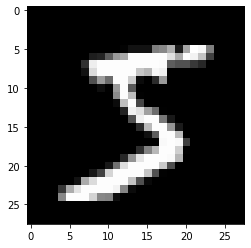

In [9]:
# functions to show an image
def show_img(num):
    img = train_data[num,:]
    img = img.reshape(28,-1)
    print(str(img.shape) + '  No.' +  str(num) + '  label:' + str(train_label[num]))
    plt.imshow(img, cmap='gray')
    plt.show()

for i in range(1):
    show_img(i)

In [10]:
print(type(test_data))
print(test_data.ndim)
print(test_data.shape)
print(test_data.size)
print(len(test_data))

<class 'numpy.ndarray'>
2
(10000, 784)
7840000
10000


In [11]:
#Gathering only 4,7,8 labels of data
nx_train=[]
ny_train=[]
digit_1 = 0
for i in range(len(train_data)):
    if train_label[i] == 4 or train_label[i] == 7 or train_label[i] == 8:
        nx_train.append(train_data[i])
        ny_train.append(train_label[i])
        digit_1 += 1
nx_train=np.array(nx_train)
ny_train=np.array(ny_train)

print(len(nx_train))
print(type(nx_train))
print(len(ny_train))
print(type(ny_train))
print(digit_1)

17958
<class 'numpy.ndarray'>
17958
<class 'numpy.ndarray'>
17958


In [12]:
nx_test=[]
ny_test=[]
digit_1 = 0
for i in range(len(test_data)):
    if train_label[i] == 4 or train_label[i] == 7 or train_label[i] == 8:
        nx_test.append(test_data[i])
        ny_test.append(test_label[i])
        digit_1 += 1

nx_test=np.array(nx_test)
ny_test=np.array(ny_test)

print(len(nx_test))
print(type(nx_test))
print(len(ny_test))
print(type(ny_test))
print(digit_1)

2994
<class 'numpy.ndarray'>
2994
<class 'numpy.ndarray'>
2994


Shape of X: (17958, 784)
Shape of transformed X: (17958, 2)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


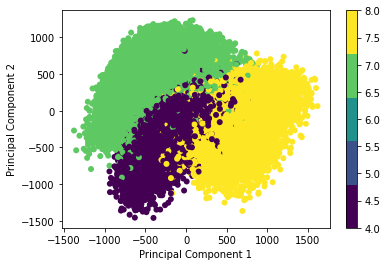

In [16]:
#PCA Implementation from Scratch 111111111111111111111
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.eigenvalues = None
        self.mean = None
    def fit(self, X):
        # Mean centering
        self.mean = np.mean(X, axis=0)
        X = X - self.mean
        # covariance, function needs samples as columns
        cov = np.cov(X.T)
        # eigenvalues, eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvectors
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.eigenvalues=eigenvalues
        # store first n eigenvectors
        self.components = eigenvectors[0:self.n_components]
    def transform(self, X):
        # project data
        X = X - self.mean
        return np.dot(X, self.components.T)

X = nx_train
y=ny_train
# Project the data onto principal components 2
pca1 = PCA(2)
pca1.fit(X)
evac=pca1.components
eval=pca1.eigenvalues
X_projected = pca1.transform(X)
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
plt.scatter(x1, x2,c=y, edgecolor='none', alpha=1,cmap=plt.cm.get_cmap('viridis', 5))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Shape of X: (17958, 784)
Shape of transformed X: (17958, 200)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


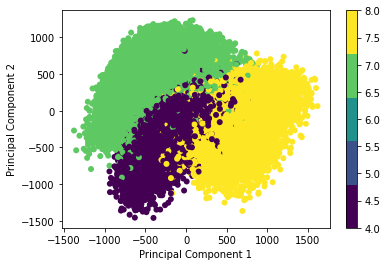

In [17]:
# Project the data onto principal components 2
pca2 = PCA(200)
pca2.fit(X)
evac=pca2.components
eval=pca2.eigenvalues
X_projected = pca2.transform(X)
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
plt.scatter(x1, x2,c=y, edgecolor='none', alpha=1,cmap=plt.cm.get_cmap('viridis', 5))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

Shape of X: (17958, 784)
Shape of transformed X: (17958, 300)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


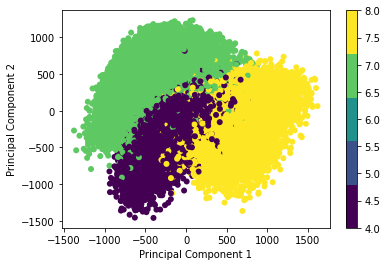

In [18]:
# Project the data onto principal components 2
pca3 = PCA(300)
pca3.fit(X)
evac=pca3.components
eval=pca3.eigenvalues
X_projected = pca3.transform(X)
print('Shape of X:', X.shape)
print('Shape of transformed X:', X_projected.shape)
x1 = X_projected[:, 0]
x2 = X_projected[:, 1]
plt.scatter(x1, x2,c=y, edgecolor='none', alpha=1,cmap=plt.cm.get_cmap('viridis', 5))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()